In [1]:
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import interpolate
from tqdm import tqdm

In [2]:
igm_database = hp.File('IGMspec_DB_v02.hdf5','r')

In [3]:
dataset1 = igm_database['SDSS_DR7']
dataset1_meta = dataset1['meta']
dataset1_spec = dataset1['spec']
dataset1_spec_wave = dataset1_spec['wave']
dataset1_spec_flux = dataset1_spec['flux']
dataset1_spec_1sig = dataset1_spec['sig']
dataset1_spec_continuum = dataset1_spec['co']

(b'000006.53+003055.2', 0.027228, 0.515341, 1.8238259553909302, 20.384, 0.065, 20.461, 0.034, 20.324, 0.038, 20.093, 0.041, 20.042, 0.121, 0.13, 20.508, 0.0, 0.0, 0.0, -9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, -25.109, 0.091, 0, 0, 1, 0, 34603008, 0, 0, 0, 0, 1, 0, 0, 3325, 52522, 52203, 685, 467, 41, 5, 108, 118, 34603008, 0, 0, 0, 0, 1, 0, 0, 20.384, 0.065, 20.461, 0.034, 20.324, 0.038, 20.093, 0.041, 20.042, 0.121, b'588015509806252150', b'193034571183292416', b' SDSS J000006.53+003055.2 ', b'2001-10-21', 2000.0, 2000.0, 0.0, b'SDSS-HW', b'QSO', 302257, b'spSpec-52203-0685-467.fit.gz', 3843, 3803.6452032855573, 9212.977276685555, 0, b'SDSS', b'BOTH', b'SDSS 2.5-M')
0 3842


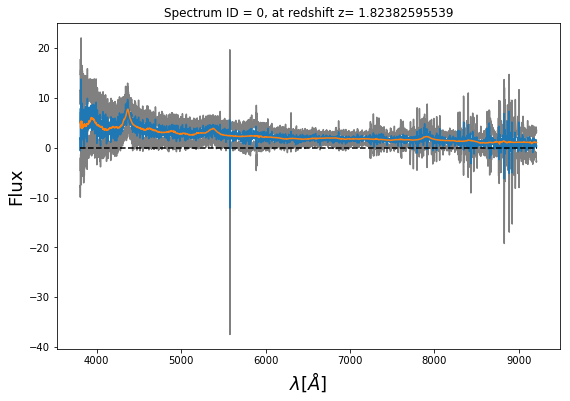

In [4]:
qid = 0
temp = dataset1_meta[qid]

print(temp)

ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
if ll > ul:
    ll = 0
print(ll,ul)

fig = plt.figure(figsize=(9,6))
#plt.plot(dataset1_spec_wave[qid,0:],dataset1_spec_flux[qid,0:],)
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] + 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] - 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul],)
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_continuum[qid,ll:ul],)
plt.plot([dataset1_spec_wave[qid,ll],dataset1_spec_wave[qid,ul]],[0,0],'k--')
plt.xlabel(r'$\lambda [\AA]$',fontsize=18)
plt.ylabel('Flux',fontsize=18)
plt.title('Spectrum ID = '+str(qid)+', at redshift z= '+str(temp[3]))
plt.show()




In [7]:
print('ideally the wavelength range should be: [3782,9266]')

for qid in range(100):
    #print(np.amax(dataset1_spec_wave[qid,0:]))
    temp = dataset1_meta[qid]
    #print('redshift z= '+str(temp[3]))
    ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
    ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
    if ll > ul:
        ll = 0
    print(dataset1_spec_wave[qid,ll],dataset1_spec_wave[qid,ul])

    

ideally the wavelength range should be: [3782,9266]
3803.64520329 9212.97727669
3803.64520329 9212.97727669
3817.68419498 9215.09888735
3804.5211258 9210.85615448
3802.76948244 9196.02196659
3803.64520329 9210.85615448
3799.26861476 9191.78801694
3797.51938971 9198.1396727
3802.76948244 9208.73552063
3799.26861476 9202.37654806
3800.14352942 9189.67177319
3803.64520329 9219.34357452
3806.27357601 9212.97727669
3805.39725003 9215.09888735
3803.64520329 9212.97727669
3803.64520329 9208.73552063
3832.657404 9179.09786057
3809.78089846 9219.34357452
3833.54000759 9179.09786057
3803.64520329 9208.73552063
3799.26861476 9198.1396727
3795.77097003 9196.02196659
3803.64520329 9208.73552063
3798.39390155 9191.78801694
3799.26861476 9198.1396727
3803.64520329 9206.61537502
3796.64507922 9193.90474804
3802.76948244 9206.61537502
3799.26861476 9189.67177319
3796.64507922 9196.02196659
3800.14352942 9204.49571753
3808.02683344 9208.73552063
3822.08199743 9219.34357452
3795.77097003 9196.02196659
38

In [9]:
# for a galaxy, absorption by a LLS? or LAE forest cloud member thingie...
# could happen between z=0 values: [912,1216]A to z= z_em values: [912,1216]*(1+z)A
# so the range I want to cover is [912,1216*(1+z_em)]A

# initial assumption: there's only one type of attenuating agent, and that a cloud at a fixed redshift
# absorbing only the Ly\alpha wavelength.
# (relax this assumption to first order later by saying well, instead of single wavelength abs, it could be
# Ly\alpha at one redshift, or Ly\beta at another redshift, or ... weighted by relative probabilities of it being
# any of those things from cross sections or some such)
# this is not even considering LLS or DLAs or anything...
# but once we start probabilistic weighting, it'll all be folded in...
# ...right?

# all right, so with the assumption, we're only interested in the range [1216, 1216*(1+z_em)]

In [27]:
# 4000/1216 = 1+z

3.289473684210526

In [26]:
print(dataset1_spec_wave[qid,ll],1216*(1+z_em))

0.0 1775.46822166


In [61]:
# lower limit on the redshift range we can probe for Ly\alpha because of the wavelength range of the spectra

zbins = np.arange(2.1,6,0.01)
transmission = np.power(10,np.arange(-3,0,0.1))

In [68]:
emgrid = np.zeros((len(zbins),len(transmission)))

for qid in tqdm(range(100000)):

    temp = dataset1_meta[qid]
    z_em = temp[3]

    if z_em > 2.3:
        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216*(1+z_em)))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216))
        if ll > ul:
            ll = 0
        #print(ll,ul)

        for i in np.arange(ll,ul):
            tigm_cloud = 1 - (dataset1_spec_continuum[qid,i] - dataset1_spec_flux[qid,i])/(dataset1_spec_continuum[qid,i])
            z_cloud = dataset1_spec_wave[qid,i]/1216 - 1
            #print(z_cloud)
            zbin_best = np.argmin(np.abs(zbins-z_cloud))
            #print(tigm_cloud)
            tigm_best = np.argmin(np.abs(transmission-tigm_cloud))
            emgrid[zbin_best,tigm_best] = emgrid[zbin_best,tigm_best] + 1




100%|██████████| 100000/100000 [04:14<00:00, 392.67it/s]


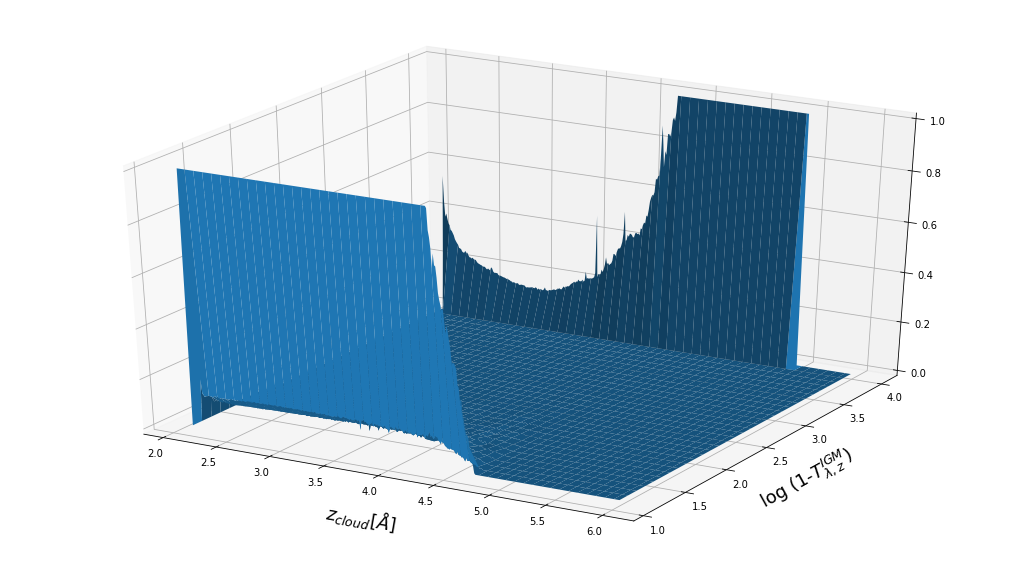

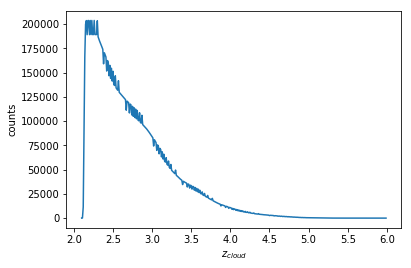

In [69]:
from mpl_toolkits.mplot3d import Axes3D

emgrid_norm = np.zeros((len(zbins),len(transmission)))
counts_zbins = np.zeros(len(zbins),)
for i in range(len(zbins)):
    if np.sum(emgrid[i,0:]) > 0:
        counts_zbins[i] = np.sum(emgrid[i,0:])
        emgrid_norm[i,0:] = emgrid[i,0:]/np.amax(emgrid[i,0:])

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(zbins,1 - np.log10(transmission))
surf = ax.plot_surface(x,y,emgrid_norm.T)
ax.set_ylabel('\n' +r'log (1-$T^{IGM}_{\lambda,z}$) ',fontsize=18,linespacing=1.8)
ax.set_xlabel('\n' +r'$z_{cloud} [\AA]$ ',fontsize=18,linespacing=1.8)
plt.show()

plt.plot(zbins,counts_zbins)
plt.xlabel(r'$z_{cloud}$')
plt.ylabel('counts')
plt.show()


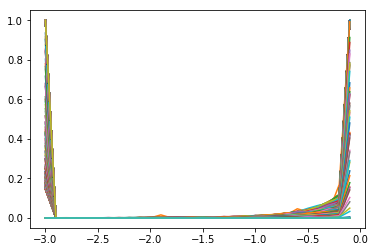

In [70]:
for i in range(len(zbins)):
    plt.plot(np.log10(transmission),emgrid_norm[i,0:])
plt.show()

In [71]:
# lower limit on the redshift range we can probe for Ly\alpha because of the wavelength range of the spectra

zbins = np.arange(2.1,6,0.01)
transmission = np.linspace(0,1,100)

In [72]:
emgrid = np.zeros((len(zbins),len(transmission)))

for qid in tqdm(range(100000)):

    temp = dataset1_meta[qid]
    z_em = temp[3]

    if z_em > 2.3:
        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216*(1+z_em)))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216))
        if ll > ul:
            ll = 0
        #print(ll,ul)

        for i in np.arange(ll,ul):
            tigm_cloud = 1 - (dataset1_spec_continuum[qid,i] - dataset1_spec_flux[qid,i])/(dataset1_spec_continuum[qid,i])
            z_cloud = dataset1_spec_wave[qid,i]/1216 - 1
            #print(z_cloud)
            zbin_best = np.argmin(np.abs(zbins-z_cloud))
            #print(tigm_cloud)
            tigm_best = np.argmin(np.abs(transmission-tigm_cloud))
            emgrid[zbin_best,tigm_best] = emgrid[zbin_best,tigm_best] + 1




100%|██████████| 100000/100000 [04:18<00:00, 547.44it/s]


/home/kiyer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/home/kiyer/anaconda3/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:1686: RuntimeWarning: invalid value encountered in subtract
  v2[which_pt] = np.array(ps2[i2]) - np.array(ps2[i3])
/home/kiyer/anaconda3/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:1685: RuntimeWarning: invalid value encountered in subtract
  v1[which_pt] = np.array(ps2[i1]) - np.array(ps2[i2])
/home/kiyer/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:1730: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/home/kiyer/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:1735: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
/home/kiyer/anaconda3/lib/python3.5/site-packages/mpl_toolkits/mplot3d/axes3d.py:1741: RuntimeWarning: invalid value encountered in true_divide
  for n in normals])
/home/kiye

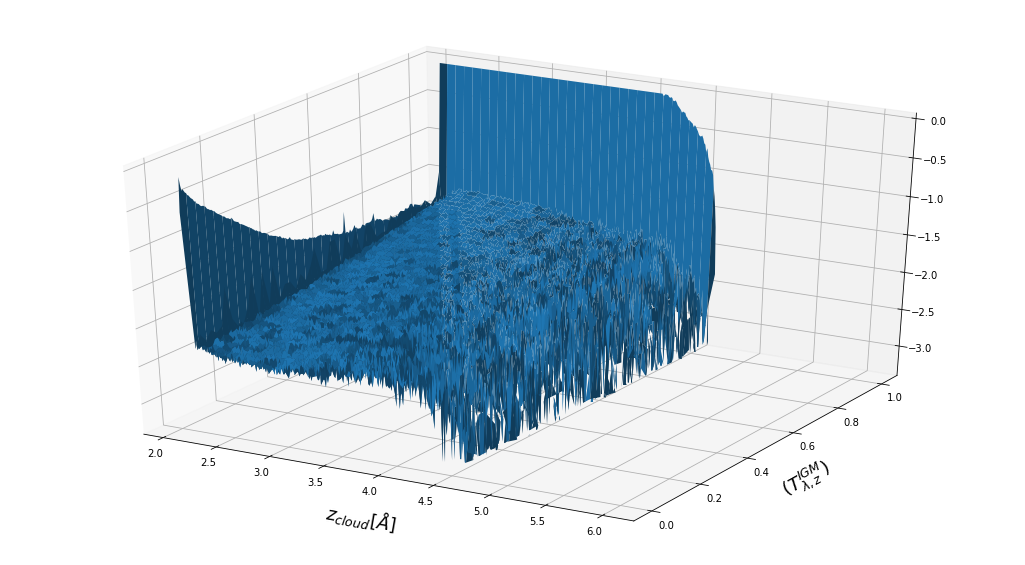

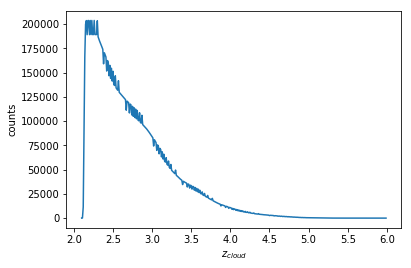

In [76]:
from mpl_toolkits.mplot3d import Axes3D

emgrid_norm = np.zeros((len(zbins),len(transmission)))
counts_zbins = np.zeros(len(zbins),)
for i in range(len(zbins)):
    if np.sum(emgrid[i,0:]) > 0:
        counts_zbins[i] = np.sum(emgrid[i,0:])
        emgrid_norm[i,0:] = emgrid[i,0:]/np.amax(emgrid[i,0:])

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(zbins,(transmission))
surf = ax.plot_surface(x,y,np.log10(emgrid_norm).T)
ax.set_ylabel('\n' +r'($T^{IGM}_{\lambda,z}$) ',fontsize=18,linespacing=1.8)
ax.set_xlabel('\n' +r'$z_{cloud} [\AA]$ ',fontsize=18,linespacing=1.8)
plt.show()

plt.plot(zbins,counts_zbins)
plt.xlabel(r'$z_{cloud}$')
plt.ylabel('counts')
plt.show()


/home/kiyer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


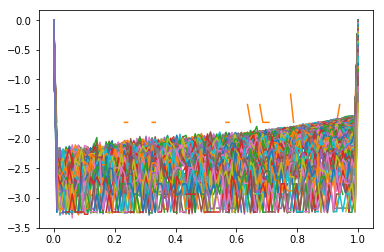

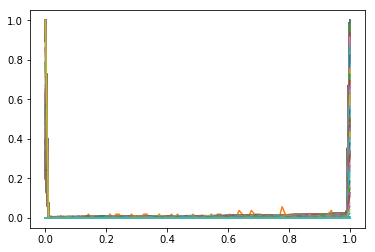

In [78]:
for i in range(len(zbins)):
    plt.plot((transmission),np.log10(emgrid_norm[i,0:]))
plt.show()

for i in range(len(zbins)):
    plt.plot((transmission),(emgrid_norm[i,0:]))
plt.show()

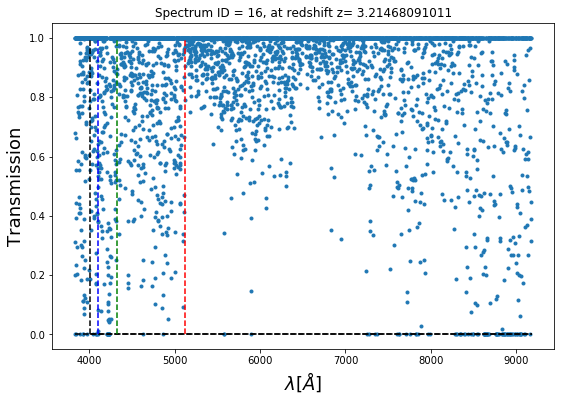

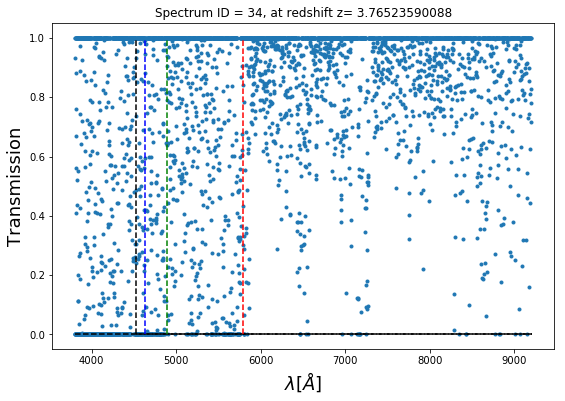

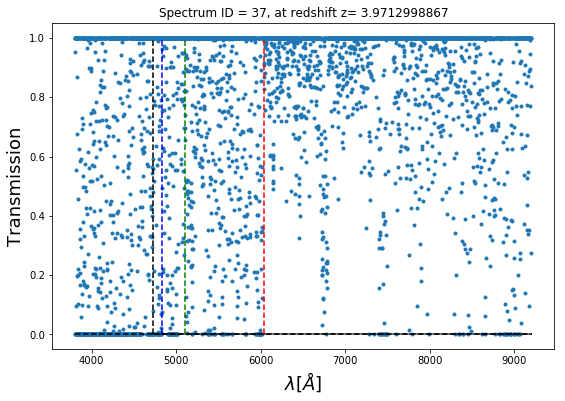

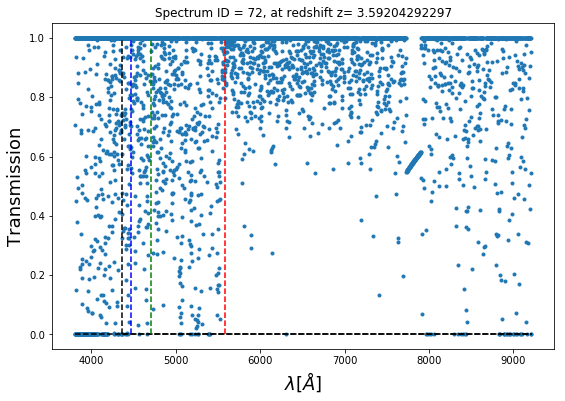

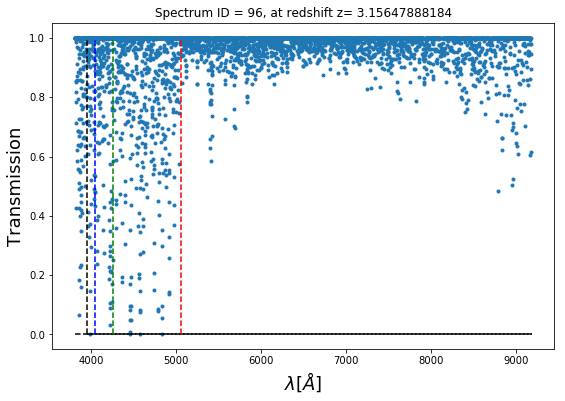

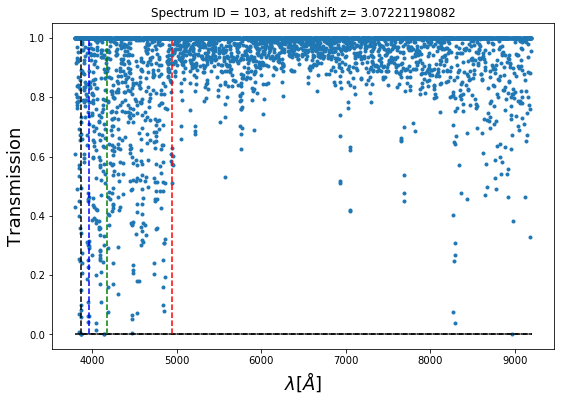

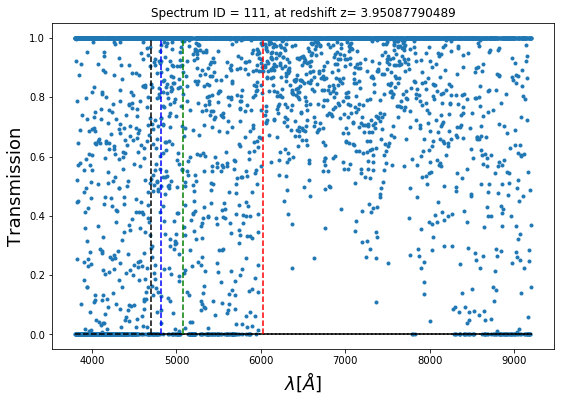

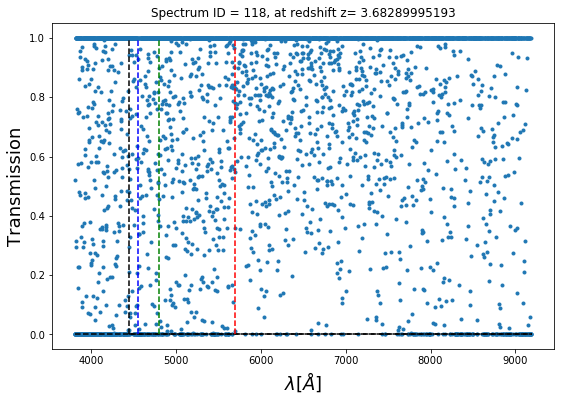

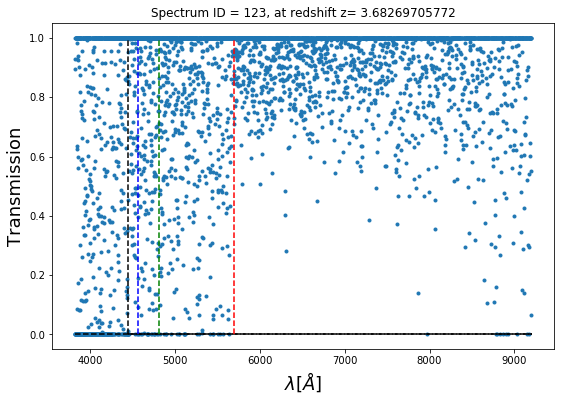

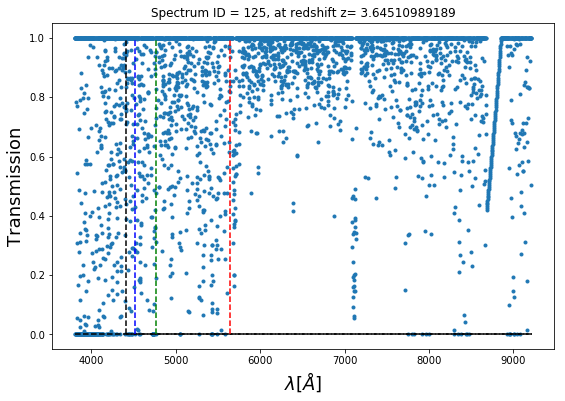

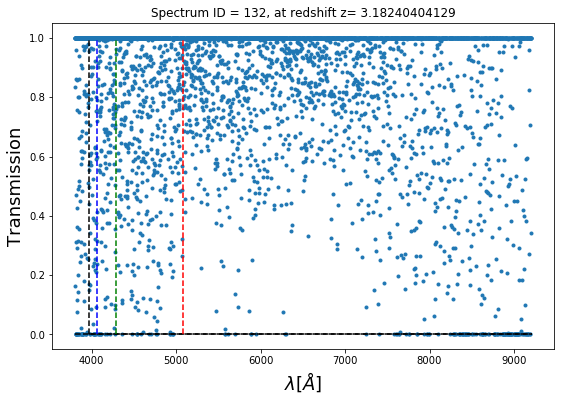

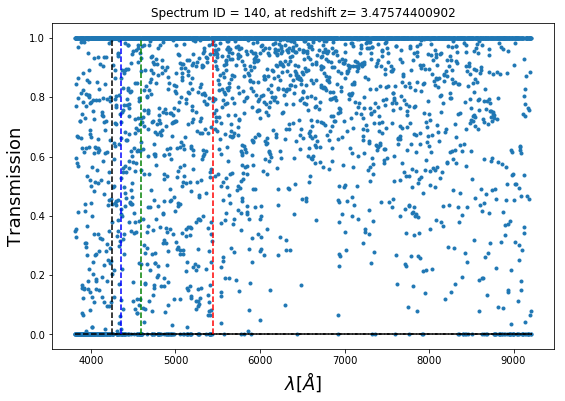

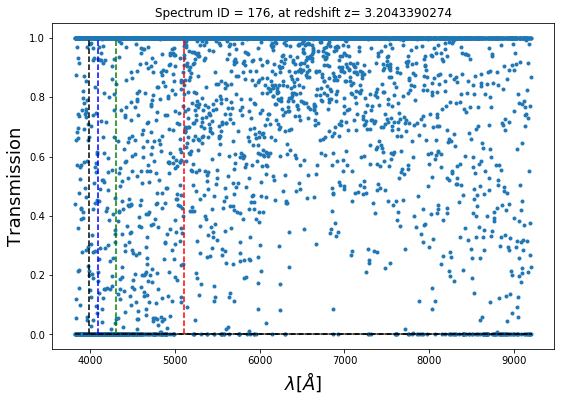

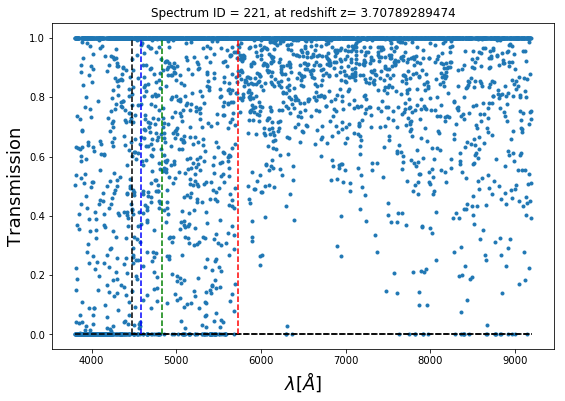

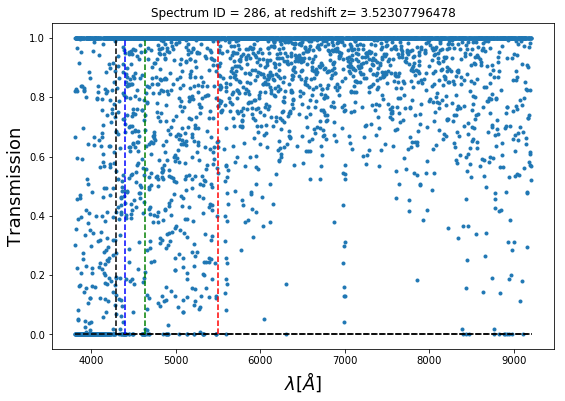

/home/kiyer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


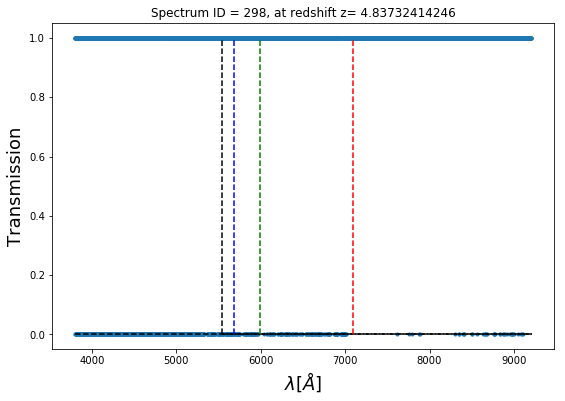

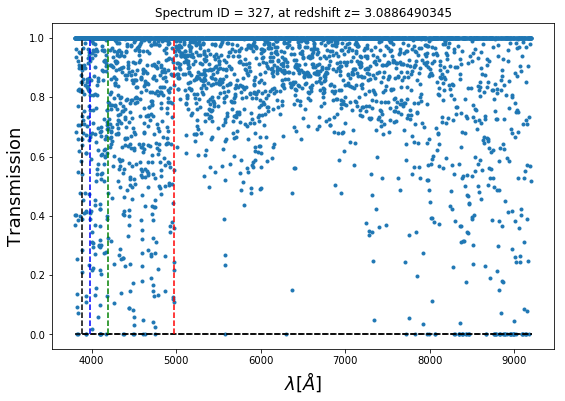

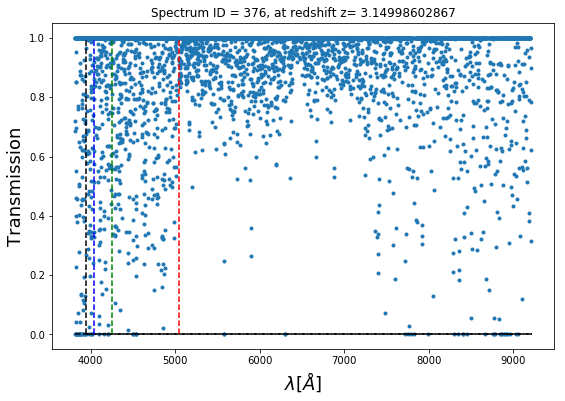

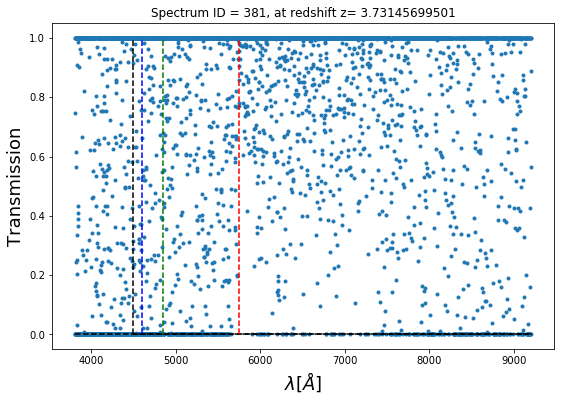

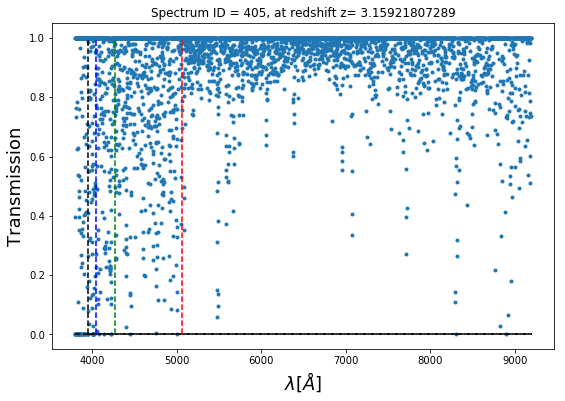

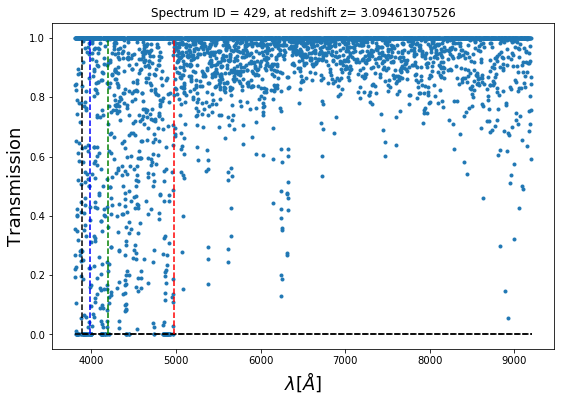

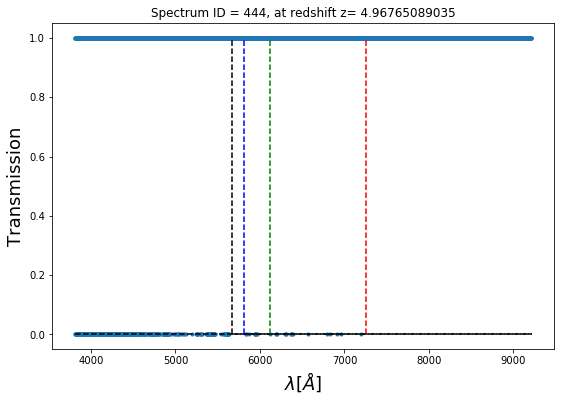

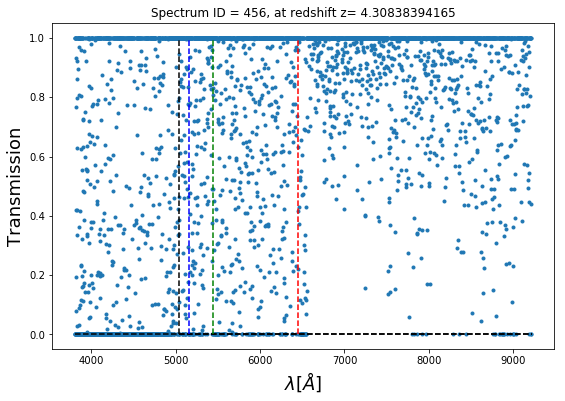

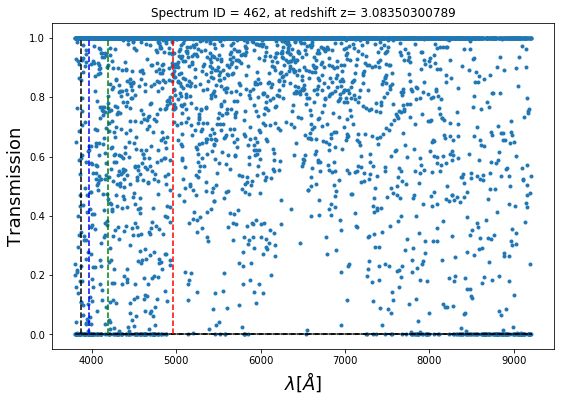

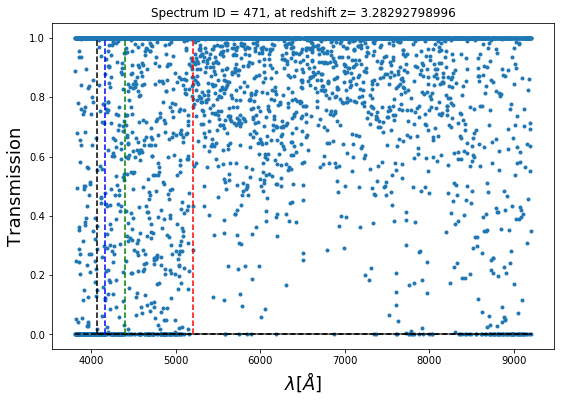

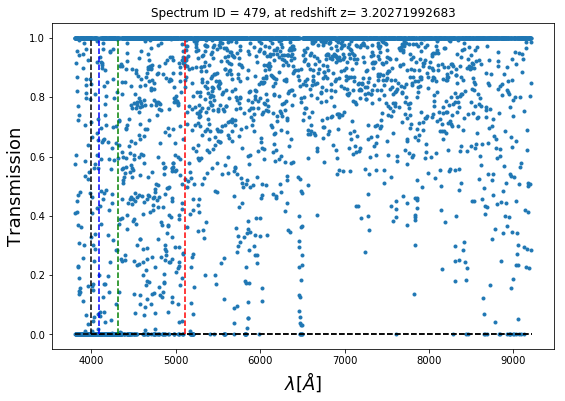

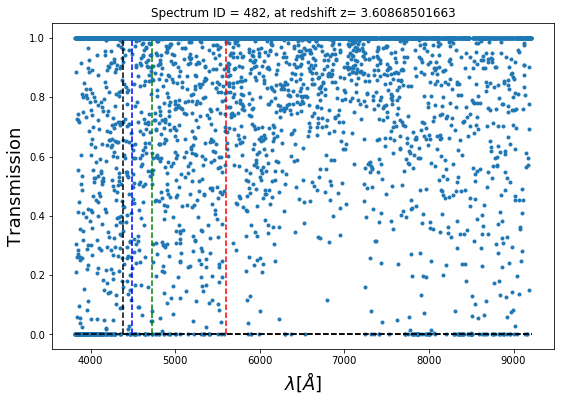

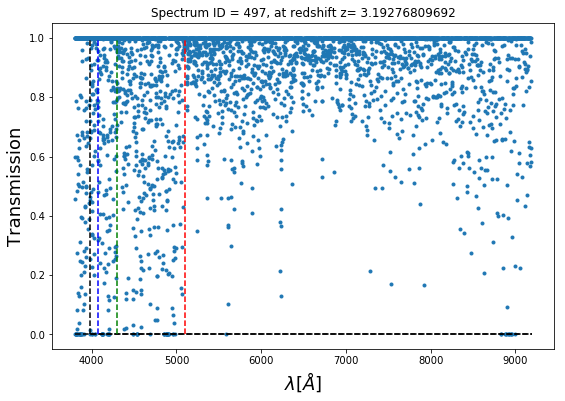

In [101]:
emgrid = np.zeros((len(zbins),len(transmission)))

for qid in (range(500)):

    temp = dataset1_meta[qid]
    z_em = temp[3]

    #if z_em > 2.3:
    if z_em > 3.0:
        #ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216*(1+z_em)))
        #ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216))
        
        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
        if ll > ul:
            ll = 0
        #print(ll,ul)

        optical_depth = (dataset1_spec_continuum[qid,ll:ul]-dataset1_spec_flux[qid,ll:ul])/dataset1_spec_continuum[qid,ll:ul]
        mask1 = optical_depth < 0
        mask2 = optical_depth > 1
        optical_depth[mask1] = 0
        optical_depth[mask2] = 1

        fig = plt.figure(figsize=(9,6))
        plt.plot(dataset1_spec_wave[qid,ll:ul],1-optical_depth,'.')
        #plt.plot(dataset1_spec_wave[qid,0:],dataset1_spec_flux[qid,0:],)
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] + 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] - 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul],)
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_continuum[qid,ll:ul],)
        if (950*(1+z_em) < dataset1_spec_wave[qid,ll]):
            plt.plot([950*(1+z_em),dataset1_spec_wave[qid,ul]],[0,0],'k--')
        else:
            plt.plot([dataset1_spec_wave[qid,ll],dataset1_spec_wave[qid,ul]],[0,0],'k--')
        plt.plot([950*(1+z_em),dataset1_spec_wave[qid,ul]],[0,0],'k--')
        plt.plot([1216*(1+z_em),1216*(1+z_em)],[0,1],'r--')
        plt.plot([1026*(1+z_em),1026*(1+z_em)],[0,1],'g--')
        plt.plot([973*(1+z_em),973*(1+z_em)],[0,1],'b--')
        plt.plot([950*(1+z_em),950*(1+z_em)],[0,1],'k--')
        plt.xlabel(r'$\lambda [\AA]$',fontsize=18)
        plt.ylabel('Transmission',fontsize=18)
        plt.title('Spectrum ID = '+str(qid)+', at redshift z= '+str(temp[3]))
        plt.show()




In [92]:
1216*(1+2.604)

4382.464

/home/kiyer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


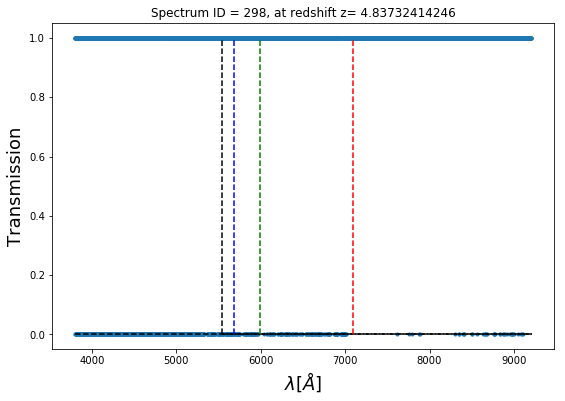

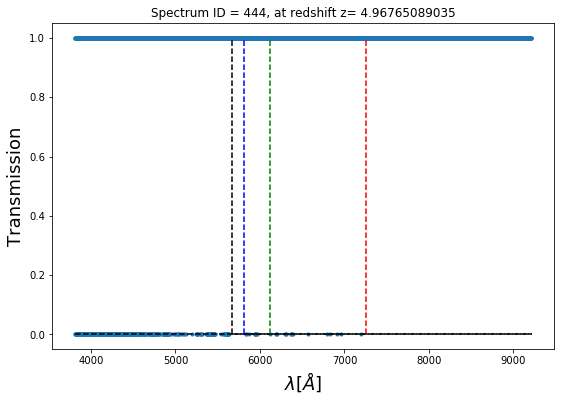

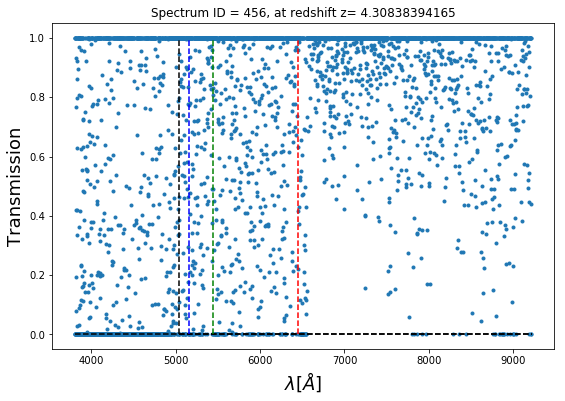

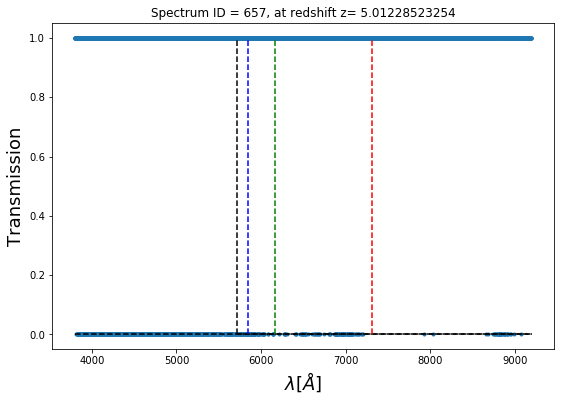

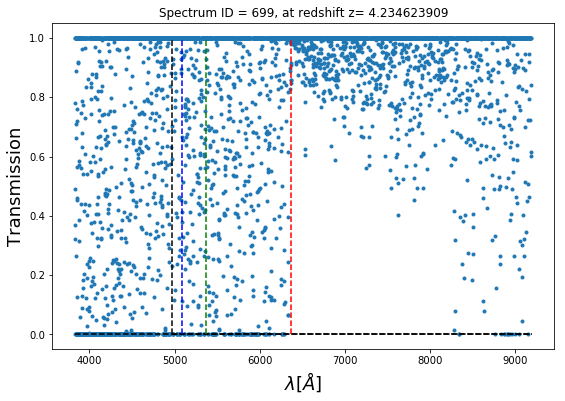

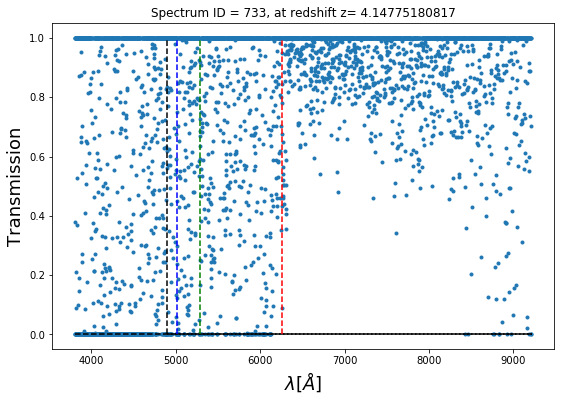

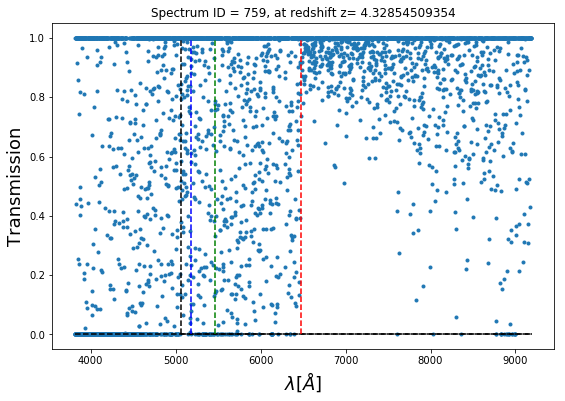

In [103]:
emgrid = np.zeros((len(zbins),len(transmission)))

for qid in (range(1000)):

    temp = dataset1_meta[qid]
    z_em = temp[3]

    #if z_em > 2.3:
    if z_em > 4.0:
        #ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216*(1+z_em)))
        #ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216))
        
        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
        if ll > ul:
            ll = 0
        #print(ll,ul)

        optical_depth = (dataset1_spec_continuum[qid,ll:ul]-dataset1_spec_flux[qid,ll:ul])/dataset1_spec_continuum[qid,ll:ul]
        mask1 = optical_depth < 0
        mask2 = optical_depth > 1
        optical_depth[mask1] = 0
        optical_depth[mask2] = 1

        fig = plt.figure(figsize=(9,6))
        plt.plot(dataset1_spec_wave[qid,ll:ul],1-optical_depth,'.')
        #plt.plot(dataset1_spec_wave[qid,0:],dataset1_spec_flux[qid,0:],)
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] + 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] - 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul],)
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_continuum[qid,ll:ul],)
        if (950*(1+z_em) < dataset1_spec_wave[qid,ll]):
            plt.plot([950*(1+z_em),dataset1_spec_wave[qid,ul]],[0,0],'k--')
        else:
            plt.plot([dataset1_spec_wave[qid,ll],dataset1_spec_wave[qid,ul]],[0,0],'k--')
        plt.plot([950*(1+z_em),dataset1_spec_wave[qid,ul]],[0,0],'k--')
        plt.plot([1216*(1+z_em),1216*(1+z_em)],[0,1],'r--')
        plt.plot([1026*(1+z_em),1026*(1+z_em)],[0,1],'g--')
        plt.plot([973*(1+z_em),973*(1+z_em)],[0,1],'b--')
        plt.plot([950*(1+z_em),950*(1+z_em)],[0,1],'k--')
        plt.xlabel(r'$\lambda [\AA]$',fontsize=18)
        plt.ylabel('Transmission',fontsize=18)
        plt.title('Spectrum ID = '+str(qid)+', at redshift z= '+str(temp[3]))
        plt.show()




/home/kiyer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


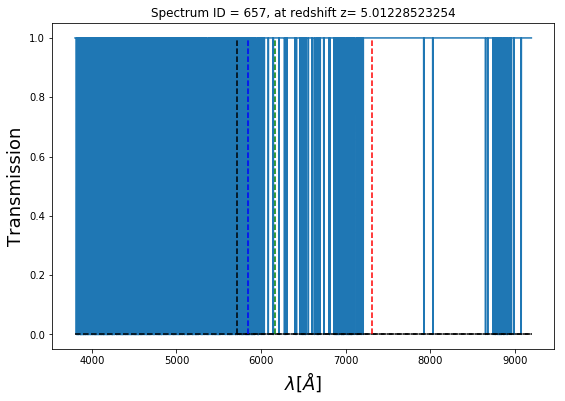

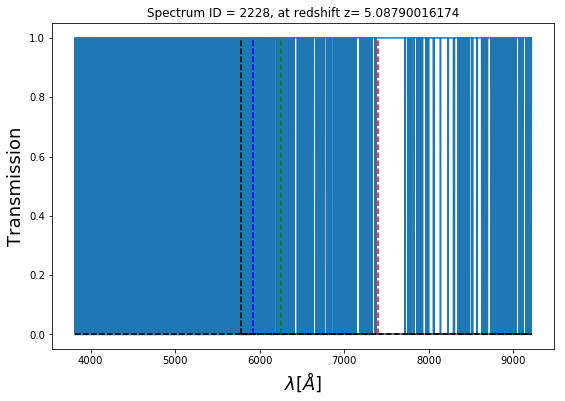

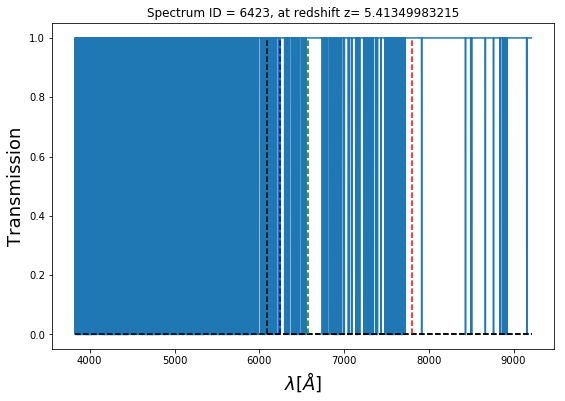

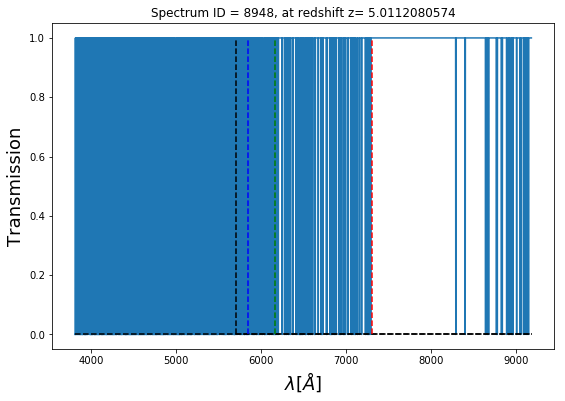

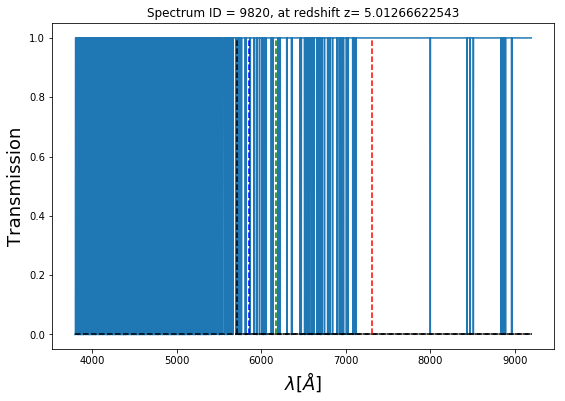

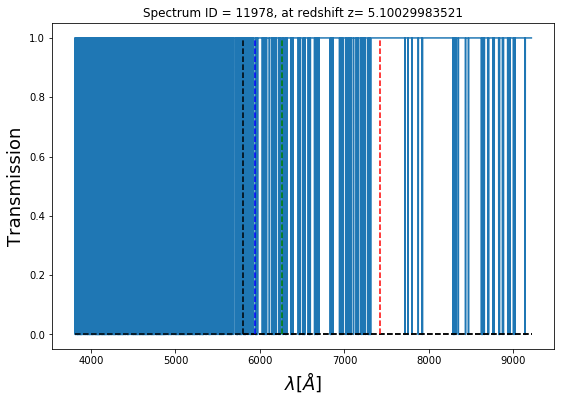

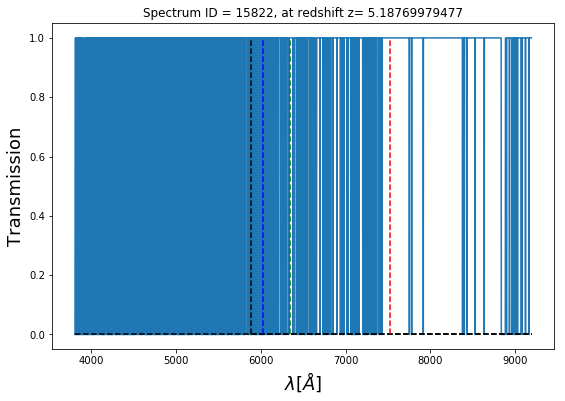

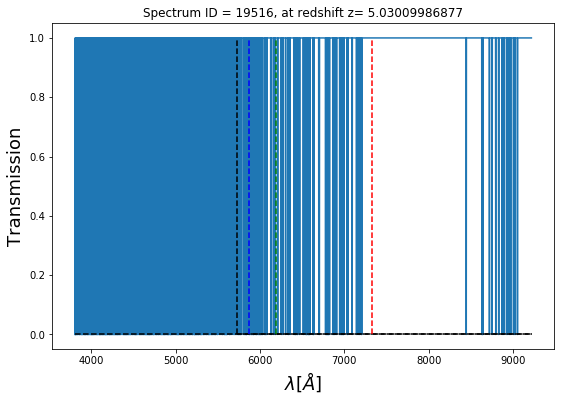

In [107]:
emgrid = np.zeros((len(zbins),len(transmission)))

for qid in (range(20000)):

    temp = dataset1_meta[qid]
    z_em = temp[3]

    #if z_em > 2.3:
    if z_em > 5.0:
        #ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216*(1+z_em)))
        #ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-1216))
        
        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
        if ll > ul:
            ll = 0
        #print(ll,ul)

        optical_depth = (dataset1_spec_continuum[qid,ll:ul]-dataset1_spec_flux[qid,ll:ul])/dataset1_spec_continuum[qid,ll:ul]
        mask1 = optical_depth < 0
        mask2 = optical_depth > 1
        optical_depth[mask1] = 0
        optical_depth[mask2] = 1

        fig = plt.figure(figsize=(9,6))
        plt.plot(dataset1_spec_wave[qid,ll:ul],1-optical_depth,)
        #plt.plot(dataset1_spec_wave[qid,0:],dataset1_spec_flux[qid,0:],)
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] + 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] - 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul],)
        #plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_continuum[qid,ll:ul],)
        if (950*(1+z_em) < dataset1_spec_wave[qid,ll]):
            plt.plot([950*(1+z_em),dataset1_spec_wave[qid,ul]],[0,0],'k--')
        else:
            plt.plot([dataset1_spec_wave[qid,ll],dataset1_spec_wave[qid,ul]],[0,0],'k--')
        plt.plot([950*(1+z_em),dataset1_spec_wave[qid,ul]],[0,0],'k--')
        plt.plot([1216*(1+z_em),1216*(1+z_em)],[0,1],'r--')
        plt.plot([1026*(1+z_em),1026*(1+z_em)],[0,1],'g--')
        plt.plot([973*(1+z_em),973*(1+z_em)],[0,1],'b--')
        plt.plot([950*(1+z_em),950*(1+z_em)],[0,1],'k--')
        plt.xlabel(r'$\lambda [\AA]$',fontsize=18)
        plt.ylabel('Transmission',fontsize=18)
        plt.title('Spectrum ID = '+str(qid)+', at redshift z= '+str(temp[3]))
        plt.show()




In [ ]:
# two things to do now. one is the SDSS filter curves, try different absorption profiles 
# 1. with a flat spectrum? or with a galaxy spectrum generated by FSPS
# 2. apply different IGM absorption profiles from the stochastic set, 
# 2b. compare with madau IGM absorption profile
# 3. and multiply by filter curves. 
# 4. compare against Madau and Inoue absorption profiles.
# 5. look at difference in photo-z, or photo-z distribution
# ideally run a photo-z code to see difference in redshift estimate, but for now just do 1-4